In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')

display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
# Блок для функций
# Применять функции целесообразно при получении большего опыта в анализе данных.



# Первичная обработка данных и их анализ по столбцам

In [3]:
stud_math.columns # Данные о колонках

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
#Преобразуем заголовки таблицы
stud_math = stud_math.rename(columns={'Medu' : 'medu', 'Pstatus' : 'pstatus', 'Fedu' : 'fedu', 'Mjob' : 'mjob', 'Fjob' : 'fjob', 'studytime, granular' : 'studytime_granular'})
display(stud_math.head(0))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [5]:
display(stud_math.school.unique())
display(stud_math.school.value_counts())
#Думаю, эти данные не нужны

array(['GP', 'MS'], dtype=object)

GP    349
MS     46
Name: school, dtype: int64

In [6]:
#Анализ столбца sex
display(stud_math.sex.unique())
display(stud_math.sex.value_counts())

array(['F', 'M'], dtype=object)

F    208
M    187
Name: sex, dtype: int64

Вывод: Число мужчин и женщин практически совпадает

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

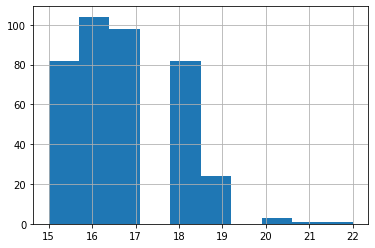

In [7]:
# Анализ столбца age
stud_math.age.hist()
display(stud_math.age.describe())
stud_math.age.value_counts()

Вывод: средний возраст респондентов 16,69 лет (17 целых). Имеют место данные о учениках 20,21 и 22 лет. Значения  входят в диапазон возраста по заданию, но возникает вопрос: что это за "старые" ученики?

In [8]:
#address
display(stud_math.address.unique())
display(stud_math.address.value_counts())
display(stud_math.loc[:, ['address']].info())
display(stud_math['address'].isnull().sum())

stud_math.address = stud_math.address.astype(str).apply(lambda x: None if x.strip() == 'NaN' else x)
display(stud_math['address'].isnull().sum())


array(['U', nan, 'R'], dtype=object)

U    295
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

17

0

Вывод: преобладают городские жители, 17 пропусков

In [9]:
#famsize — размер семьи('LE3' <= 3, 'GT3' >3)
display(stud_math.famsize.unique())
display(stud_math.famsize.value_counts())
display(stud_math['famsize'].isnull().sum())
stud_math.famsize = stud_math.famsize.astype(str).apply(lambda x: None if x.strip() == 'NaN' else x)
display(stud_math['famsize'].isnull().sum())


array([nan, 'GT3', 'LE3'], dtype=object)

GT3    261
LE3    107
Name: famsize, dtype: int64

27

0

Вывод: Преобладают большие семьи, 27 пропусков

In [10]:
#Pstatus 
display(stud_math['pstatus'])
display(stud_math.pstatus.unique())
display(stud_math.pstatus.value_counts())
display(stud_math['pstatus'].isnull().sum())
stud_math.pstatus = stud_math.pstatus.astype(str).apply(lambda x: None if x.strip() == 'NaN' else x)
display(stud_math['pstatus'].isnull().sum())

0        A
1      NaN
2        T
3        T
4        T
      ... 
390      A
391      T
392      T
393      T
394      T
Name: pstatus, Length: 395, dtype: object

array(['A', nan, 'T'], dtype=object)

T    314
A     36
Name: pstatus, dtype: int64

45

0

Вывод: преобладает полная семья, пропусков 45

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

<AxesSubplot:>

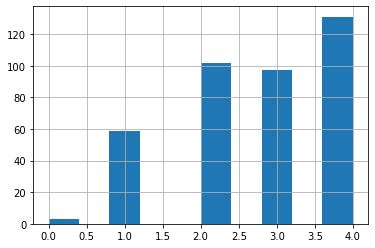

In [11]:
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#display(stud_math.medu.unique())
display(stud_math.medu.value_counts())
display(stud_math.loc[:, ['medu']].info())
stud_math.medu.hist()


Вывод: преобладает высокий уровень образования матери, 3 значения 0 (без образования).

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: fedu, dtype: int64

<AxesSubplot:>

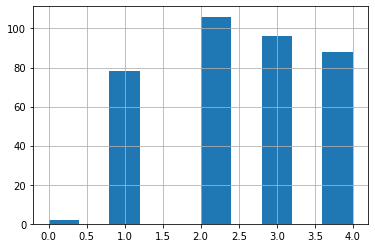

In [12]:
#Fedu
display(stud_math.fedu.value_counts())
#Одно значение 40, это выброс. Требует удаления из анализа
stud_math = stud_math.loc[stud_math.fedu < 40]
display(stud_math.fedu.value_counts())
stud_math.fedu.hist()

Вывод: у отцов преобладает образовние уровня средняя школа, образование отцов существенно ниже образования матерей

In [13]:
#Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
display(stud_math.mjob.value_counts())
display(stud_math.mjob.unique())
display(stud_math['mjob'].isnull().sum())
stud_math.mjob = stud_math.mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(stud_math['mjob'].isnull().sum())

other       125
services     90
at_home      57
teacher      48
health       31
Name: mjob, dtype: int64

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

19

0

Вывод: превалирует род деятельности матери other, 19 значений отсутствует

In [14]:
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
display(stud_math.reason.value_counts())
display(stud_math.reason.unique())
display(stud_math['reason'].isnull().sum())
stud_math.mjob = stud_math.mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(stud_math['mjob'].isnull().sum())

course        128
reputation     98
home           96
other          32
Name: reason, dtype: int64

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

16

0

Вывод: причина выбора школы связана в основном с образовательной программой

In [15]:
#guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
display(stud_math.guardian.value_counts())
display(stud_math.guardian.unique())
display(stud_math['mjob'].isnull().sum())


mother    236
father     78
other      26
Name: guardian, dtype: int64

array(['mother', 'father', 'other', nan], dtype=object)

0

Вывод: cущественно преобладает опекунство матери, думаю эти данные не нужны для анализа

1.0    225
2.0     92
3.0     21
4.0      7
Name: traveltime, dtype: int64

array([ 2.,  1.,  3., nan,  4.])

25

<AxesSubplot:>

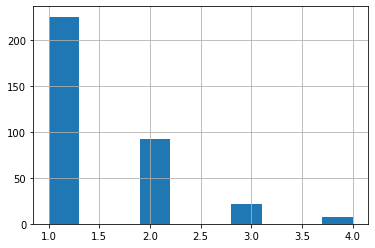

In [16]:
#traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
display(stud_math.traveltime.value_counts())
display(stud_math.traveltime.unique())
display(stud_math['traveltime'].isnull().sum())
stud_math.traveltime.hist()

Вывод: ученики находятся близко к школе, следовательно тратят мало времени на дорогу, потенциално имеют свободное время для обучения во внеучебное время.

2.0    182
1.0     98
3.0     58
4.0     25
Name: studytime, dtype: int64

array([ 2.,  3.,  1., nan,  4.])

7

<AxesSubplot:>

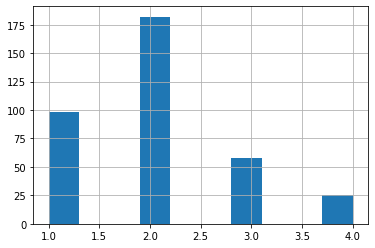

In [17]:
#studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
display(stud_math.studytime.value_counts())
display(stud_math.studytime.unique())
display(stud_math['studytime'].isnull().sum())
stud_math.studytime.hist()

Вывод: большинство учеников затрачивают 2-5 часов на учебу помимо школы, однако велик процент малозанимающихся 

In [18]:
#failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
display(stud_math.failures.value_counts())
display(stud_math.failures.unique())
display(stud_math['failures'].isnull().sum())

0.0    277
1.0     45
3.0     15
2.0     14
Name: failures, dtype: int64

array([ 0.,  3.,  2.,  1., nan])

19

Вывод: количество внеучебных неудач 0. Данные предлагаются к удалению.

In [19]:
#schoolsup — дополнительная образовательная поддержка (yes или no)
display(stud_math.schoolsup.value_counts())
display(stud_math.schoolsup.unique())
display(stud_math['schoolsup'].isnull().sum())


no     314
yes     47
Name: schoolsup, dtype: int64

array(['yes', 'no', nan], dtype=object)

9

Вывод: большинство учеников не имеют дополнительной образовательной поддержки

In [20]:
#17 famsup — семейная образовательная поддержка (yes или no)
display(stud_math.famsup.value_counts())
display(stud_math.famsup.unique())
display(stud_math['famsup'].isnull().sum())


yes    204
no     131
Name: famsup, dtype: int64

array(['no', 'yes', nan], dtype=object)

35

Вывод: большинство учеников имеют поддержку, данный признак требует проверки, 35 пропусков

In [21]:
#18 paid — дополнительные платные занятия по математике (yes или no)
display(stud_math.paid.value_counts())
display(stud_math.paid.unique())
display(stud_math['paid'].isnull().sum())

no     188
yes    145
Name: paid, dtype: int64

array(['no', nan, 'yes'], dtype=object)

37

Вывод: большинство учеников не занимаются платно

In [22]:
#19 activities — дополнительные внеучебные занятия (yes или no)
display(stud_math.activities.value_counts())
display(stud_math.activities.unique())
display(stud_math['activities'].isnull().sum())
# Паритет

yes    180
no     176
Name: activities, dtype: int64

array(['no', 'yes', nan], dtype=object)

14

Вывод: практически половина респондентов заниматеся дополнительно.

In [23]:
#20 nursery — посещал детский сад (yes или no)
display(stud_math.nursery.value_counts())
display(stud_math.nursery.unique())
display(stud_math['nursery'].isnull().sum())


yes    279
no      75
Name: nursery, dtype: int64

array(['yes', 'no', nan], dtype=object)

16

Вывод: большинство посещали детский сад. 

In [24]:
#21 higher — хочет получить высшее образование (yes или no)
display(stud_math.higher.value_counts())
display(stud_math.higher.unique())
display(stud_math['higher'].isnull().sum())


yes    333
no      19
Name: higher, dtype: int64

array(['yes', nan, 'no'], dtype=object)

18

Вывод: большинство планирует получить высшее образование. Нежелающие навряд ли сполучат высокую оценку за экзамен 

In [25]:
#22 internet — наличие интернета дома (yes или no)
display(stud_math.internet.value_counts())
display(stud_math.internet.unique())
display(stud_math['internet'].isnull().sum())


yes    283
no      54
Name: internet, dtype: int64

array([nan, 'yes', 'no'], dtype=object)

33

Вывод: большинство имеет интернет дома. Необходимо обратить внимание на учеников без интернета

In [26]:
#23 romantic — в романтических отношениях (yes или no)
display(stud_math.romantic.value_counts())
display(stud_math.romantic.unique())
display(stud_math['romantic'].isnull().sum())

no     226
yes    116
Name: romantic, dtype: int64

array(['no', nan, 'yes'], dtype=object)

28

Вывод: 116 человек имеют романтические отношения. Предполагаю это может негативно сказаться на успеваемости

 4.0    168
 5.0     95
 3.0     59
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

24

<AxesSubplot:>

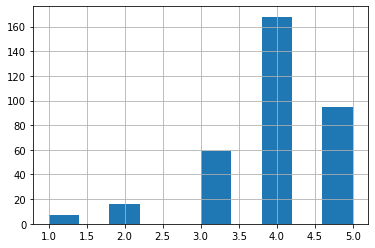

In [27]:
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
display(stud_math.famrel.value_counts())
display(stud_math.famrel.unique())
display(stud_math['famrel'].isnull().sum())

stud_math = stud_math.loc[stud_math.famrel >= 1]
stud_math.famrel.hist()


Вывод: присутствует выброс, требующий удаления, у большинства респондентов хорошие семейные отношения

In [28]:
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
display(stud_math.freetime.value_counts())
display(stud_math.freetime.unique())
display(stud_math['freetime'].isnull().sum())

3.0    134
4.0     97
2.0     54
5.0     34
1.0     17
Name: freetime, dtype: int64

array([ 3.,  2.,  4.,  1.,  5., nan])

9

Вывод: у большинства респондентов достаточно времени после школы

In [29]:
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
display(stud_math.goout.value_counts())
display(stud_math.goout.unique())
display(stud_math['goout'].isnull().sum())


3.0    115
2.0     87
4.0     71
5.0     45
1.0     19
Name: goout, dtype: int64

array([ 4.,  3.,  2.,  1.,  5., nan])

8

Вывод: у большинства респондентов есть время на общение с друзьями

5.0    111
3.0     81
4.0     58
1.0     42
2.0     40
Name: health, dtype: int64

array([ 3.,  5.,  1.,  2.,  4., nan])

13

<AxesSubplot:>

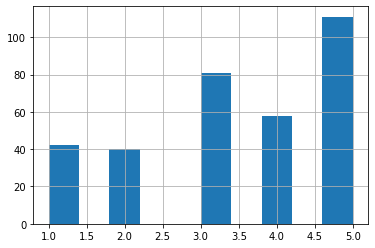

In [30]:
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
display(stud_math.health.value_counts())
display(stud_math.health.unique())
display(stud_math['health'].isnull().sum())
stud_math.health.hist()


Вывод: проблемы со здоровьем у около 20 % испытуемых

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,   7.,   8.,  25.,  14.,
        12.,  54.,  18.,  26.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,
         3., 385.,  20.,  21.,   1.,   9.,  38.,  40.,  23.,  11.,  17.,
       212.])

12

<AxesSubplot:>

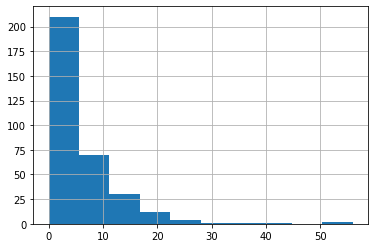

In [31]:
#28 absences — количество пропущенных занятий
#display(stud_math.absences.value_counts())
display(stud_math.absences.unique())
display(stud_math['absences'].isnull().sum())
#stud_math.absences.hist()

stud_math = stud_math.loc[stud_math.absences < 212]
stud_math.absences.hist()


Вывод: есть ученики пропустившые 212 и 385 занятий, эти значения целесообразно рассмотерть на удаление. Ученики с количеством пропусков более 30 могут попасть в группу риска

50.0     50
55.0     42
0.0      30
65.0     28
60.0     25
75.0     25
40.0     24
70.0     23
45.0     19
80.0     16
30.0     14
90.0     10
35.0      8
25.0      5
85.0      3
95.0      2
100.0     1
20.0      1
Name: score, dtype: int64

array([ 30.,  50.,  75.,  55.,  45.,  80.,  70.,  25.,  60.,  85.,  90.,
        65., 100.,  35.,  40.,  95.,   0.,  nan,  20.])

5

count    326.000000
mean      52.147239
std       22.401712
min        0.000000
25%       41.250000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

55.0

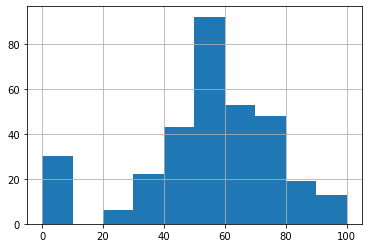

In [32]:
#29 score — баллы по госэкзамену по математике
display(stud_math.score.value_counts())
display(stud_math.score.unique())
display(stud_math['score'].isnull().sum())
stud_math.score.hist()
display(stud_math.score.describe())
display(stud_math.score.median())


Вывод: в среднем ученики получают 52 балла по математике, медианное значение отличается от среднего, 30 человек получили 0.

0     -6.0
1     -6.0
2     -6.0
3     -9.0
4     -6.0
      ... 
389   -6.0
391   -3.0
392   -3.0
393   -3.0
394   -3.0
Name: studytime_granular, Length: 331, dtype: float64

array([ -6.,  -9.,  -3.,  nan, -12.])

5

<AxesSubplot:>

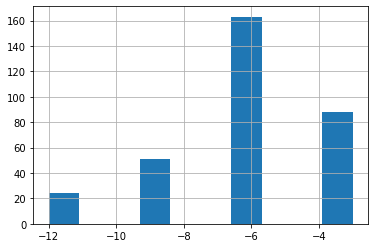

In [33]:
#studytime, granular Детализация во время учебы?
display(stud_math.studytime_granular)
display(stud_math.studytime_granular.unique())
display(stud_math['studytime_granular'].isnull().sum())
stud_math.studytime_granular.hist()

### Корреляционный анализ

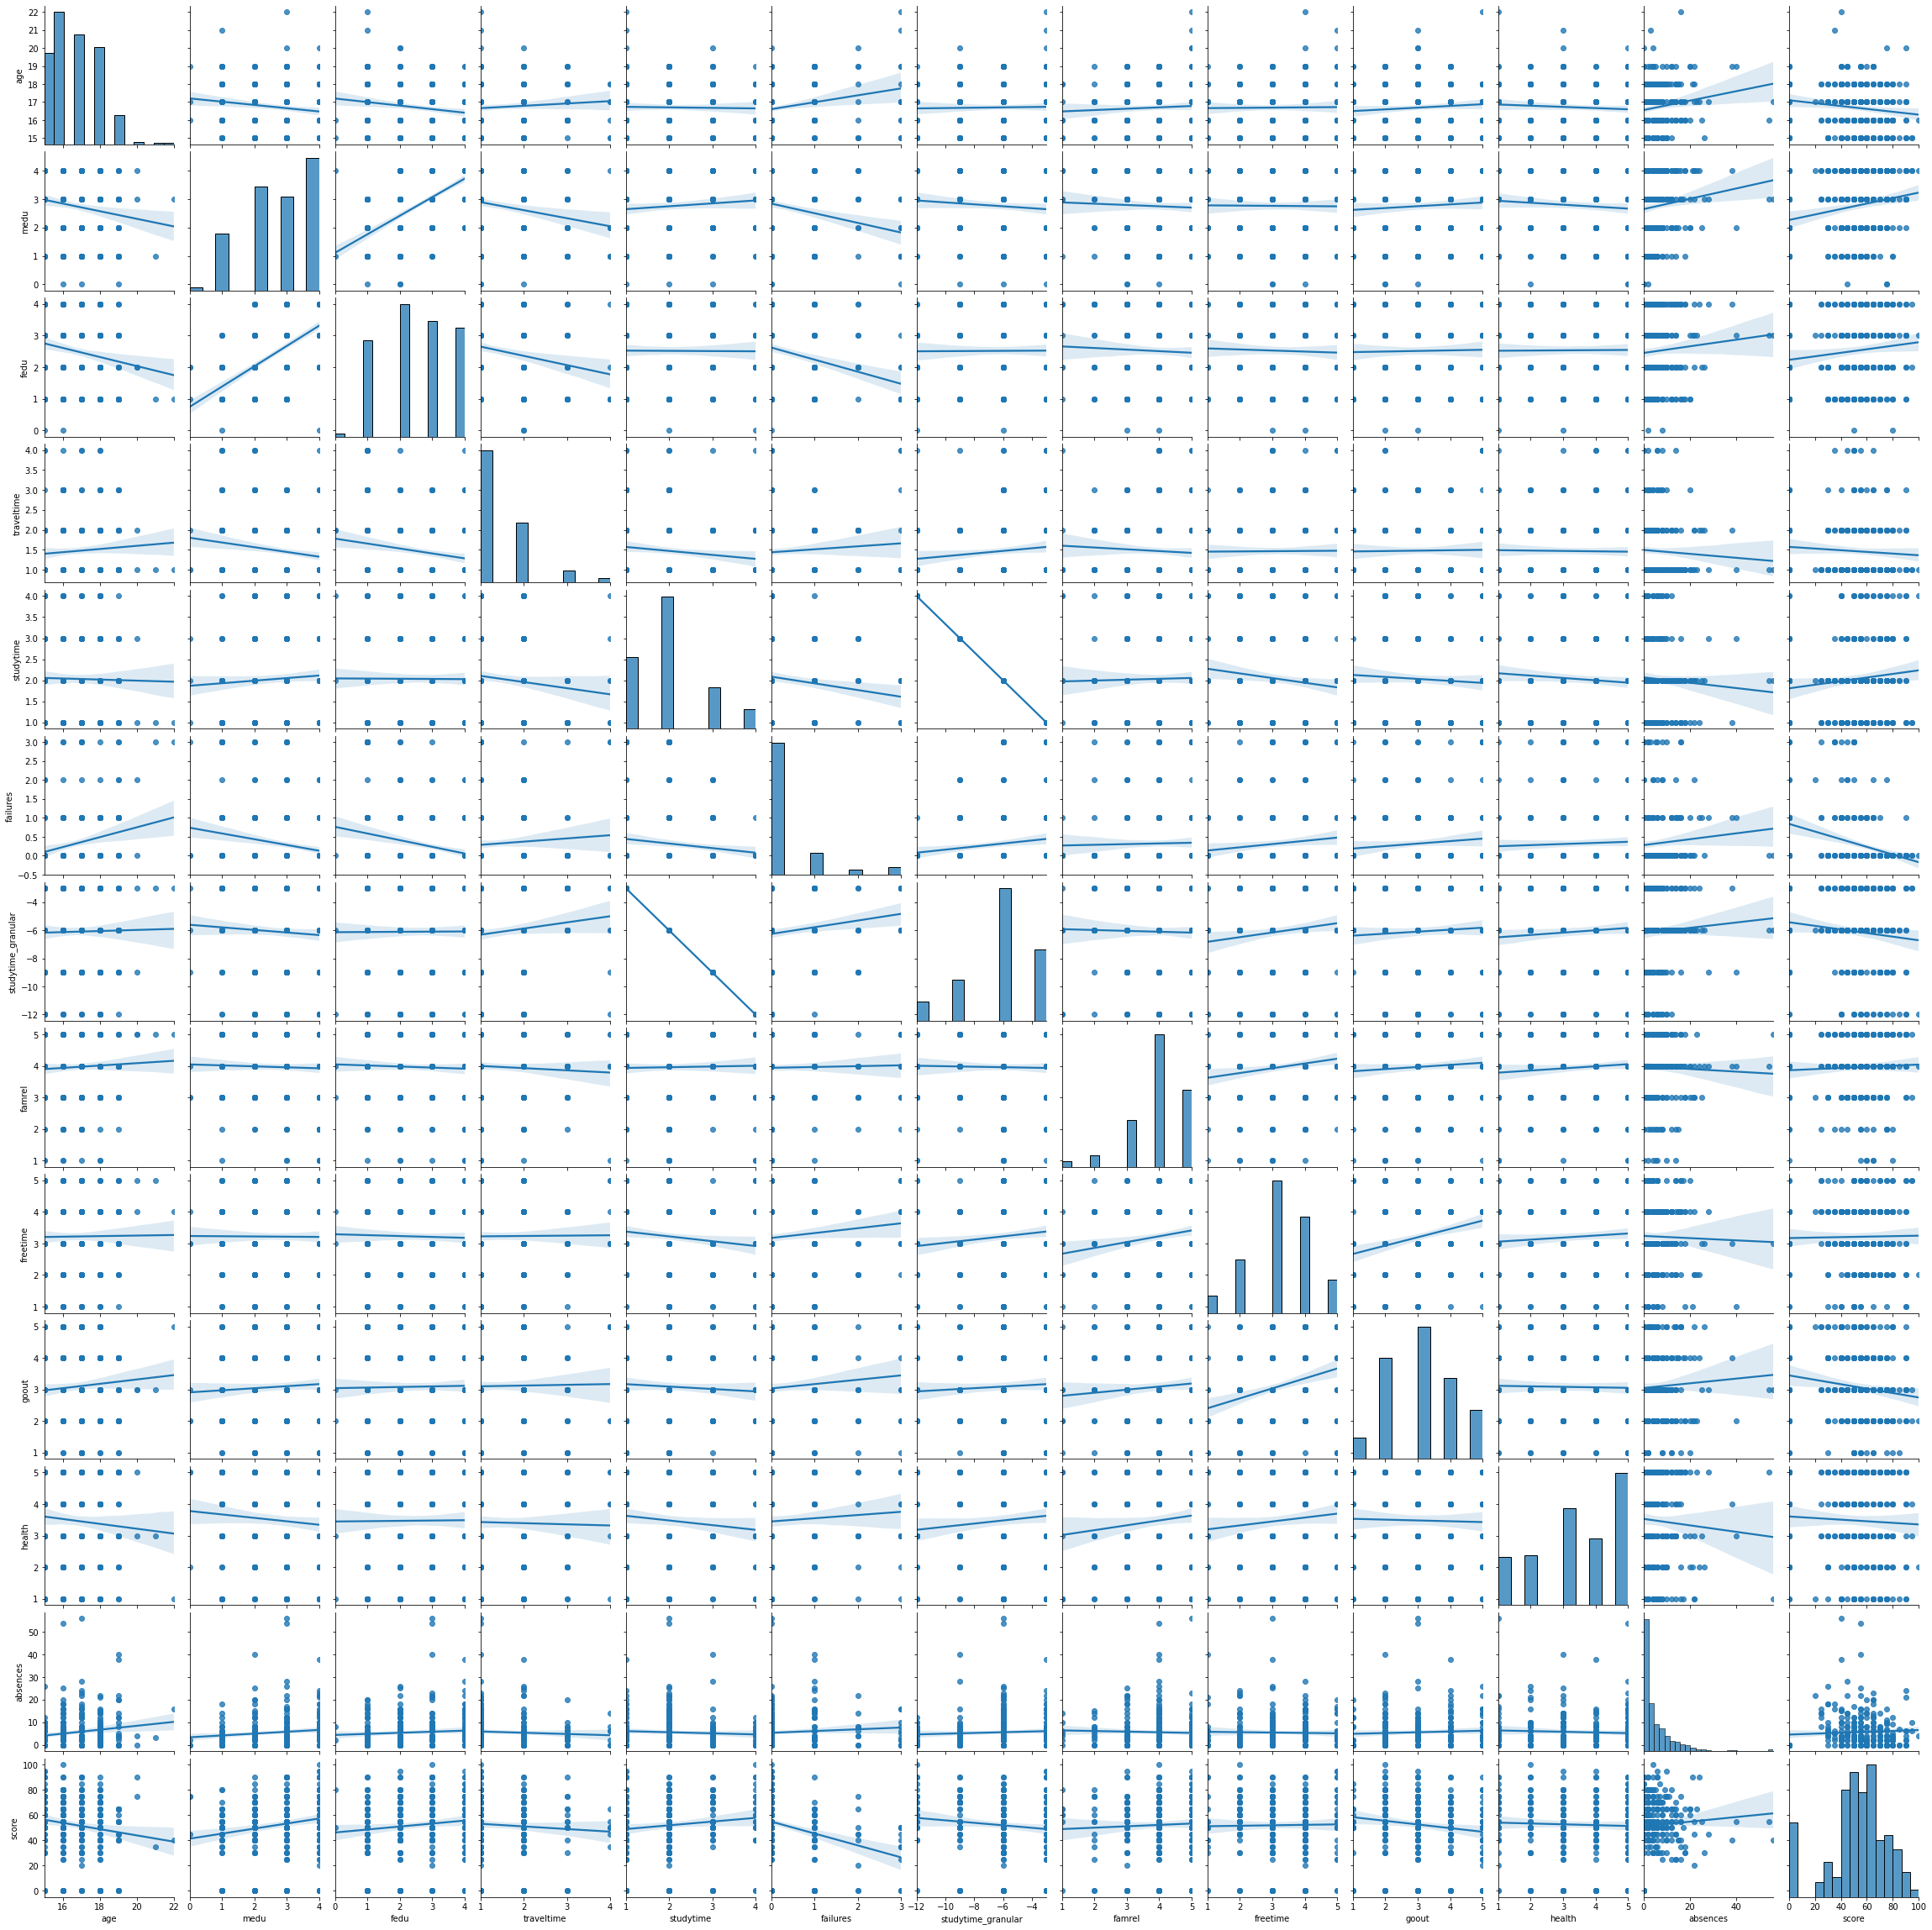

In [34]:
sns.pairplot(stud_math, kind = 'reg')

# Визуальный анализ диаграммы позволяет сделать следующие выводы:
1. Зачения absences имеют выбросы и требуют дополнительной обработки. Предполагаю, что количество пропусков не должно быть более 30. Очень важна степень близости точек на диаграмме для absences и score. Важный признак!
2. studytime/studytime_granular высоко скоррелированы. Целесообразно отказаться в дальнейшем от studytime_granular

In [35]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.156230,-0.168238,0.071708,-0.019213,0.223545,0.019213,0.053071,0.011246,0.081128,-0.071476,0.150496,-0.140704
medu,-0.156230,1.000000,0.649339,-0.183575,0.079136,-0.227670,-0.079136,-0.037540,-0.007904,0.065083,-0.086337,0.122147,0.196428
fedu,-0.168238,0.649339,1.000000,-0.190456,-0.005535,-0.259644,0.005535,-0.041272,-0.030685,0.018502,0.008007,0.070776,0.114783
traveltime,0.071708,-0.183575,-0.190456,1.000000,-0.120655,0.079594,0.120655,-0.056083,0.008059,0.015462,-0.018394,-0.052200,-0.066046
studytime,-0.019213,0.079136,-0.005535,-0.120655,1.000000,-0.138769,-1.000000,0.021930,-0.129990,-0.060053,-0.090732,-0.055309,0.112442
failures,0.223545,-0.227670,-0.259644,0.079594,-0.138769,1.000000,0.138769,0.021821,0.114783,0.094840,0.054503,0.077784,-0.308892
studytime_granular,0.019213,-0.079136,0.005535,0.120655,-1.000000,0.138769,1.000000,-0.021930,0.129990,0.060053,0.090732,0.055309,-0.112442
famrel,0.053071,-0.037540,-0.041272,-0.056083,0.021930,0.021821,-0.021930,1.000000,0.167052,0.080827,0.101424,-0.034116,0.044338
freetime,0.011246,-0.007904,-0.030685,0.008059,-0.129990,0.114783,0.129990,0.167052,1.000000,0.288308,0.089649,-0.024020,0.016692
goout,0.081128,0.065083,0.018502,0.015462,-0.060053,0.094840,0.060053,0.080827,0.288308,1.000000,-0.020271,0.050191,-0.142237


# Предварительные выводы
1. Age/score R=-0.140704 - Чем старше ученики, тем хуже результаты экзаменов
2. medu/score R=0.196428 - Результаты экзаменов существенно зависят от образования матери. У большинства респондентов матери имеют высокий уровень образования.
3. fedu/score R=0.114783 - Отцы по сравнению с матерями оказывают меньшее влияние на образование и, возможно, на воспитание детей в целом. Возможно, необходим анализ по половому признаку учеников.
4. traveltime/score R=-0.066046 Большинство респондентов находится близко к школе. Возможно, удаленость от школы негативно влияет на успеваемость, у них остается меньше времени на самостоятельную работу.
5. studytime/score R=0.112442 Большинство учеников занимаются во внеучебное время и это оказывает существенное влияние на успеваемость.  В группе риска респонденты с занятостью менее двух часов.
6. failures/score R=-0.308892 Большинство учеников не имеют внеучебных неудач. Высокое значение коэффициента.
7. studytime_granular. Признак необходимо удалить из анализа.
8. famrel/score R=0.044338 У большинства учеников хорошие семейные отношения и этот признак не оказывает влияния на результаты (что, кстати, странно и не логично)
9. freetime/score R=0.016692 У большинства учеников достаточно свободного времени и они его явно тратят не на учебу
10. goout/score R=-0.142237 У большинства учеников есть время на общение с друзьями и это негативно влияет на успеваемость.
11. health около 20% испытуемых имеют проблемы со здоровьем. Здоровье не может не влиять на уровень сдачи экзаменов.
12. absences/score R=0.060451 Большинство учеников практически не пропускают занятия. Признак имеет низкую связь с показателем успеваемости.

### Наиболее коррелированными являются medu, failures, goout

<AxesSubplot:>

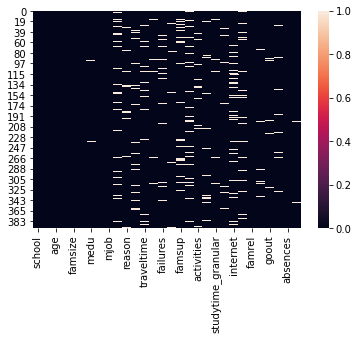

In [36]:
sns.heatmap(stud_math.isnull())

Данные имеют значительное число пропусков. Подобная ситуация имеет следующие варианты развития: выполнить построчный анализ и удалить данные (анкеты учеников) с большим числом пропусков; заполнить данные используя математические методы; исключить признаки с большим числом пропусков; выполнить повторный сбор статистики. В реальной жизни я склонялся бы к четвертому варианту, естественно, при наличии возможности.

# Анализ номинативных переменных

In [37]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

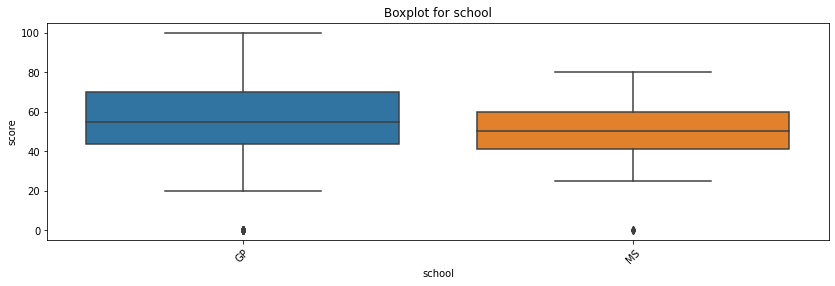

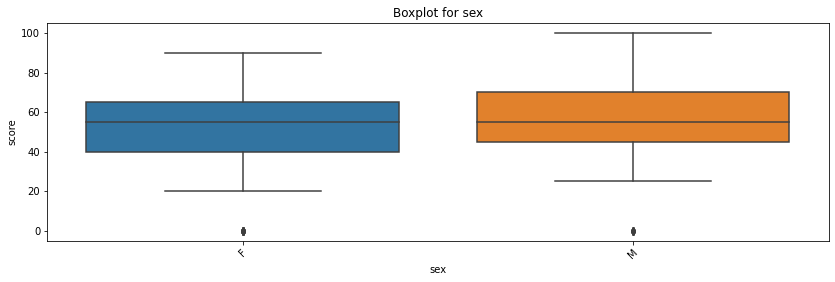

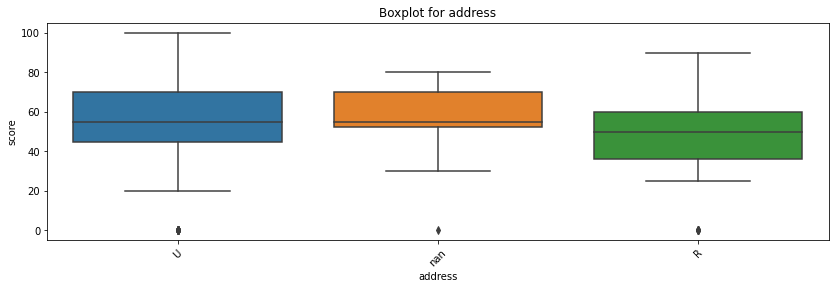

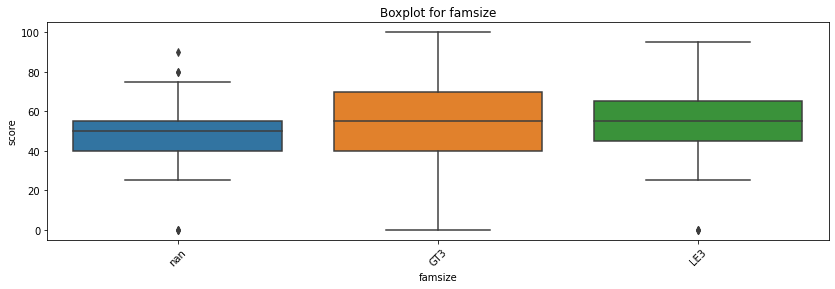

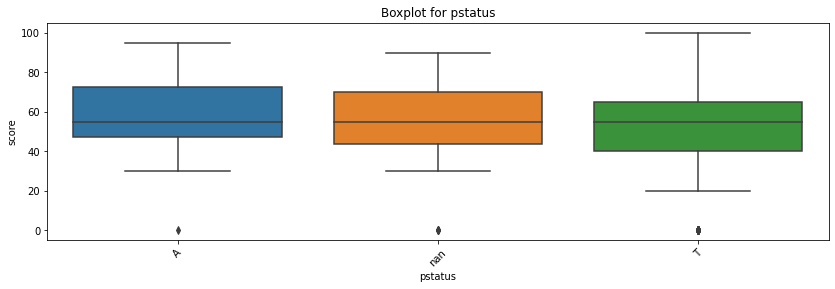

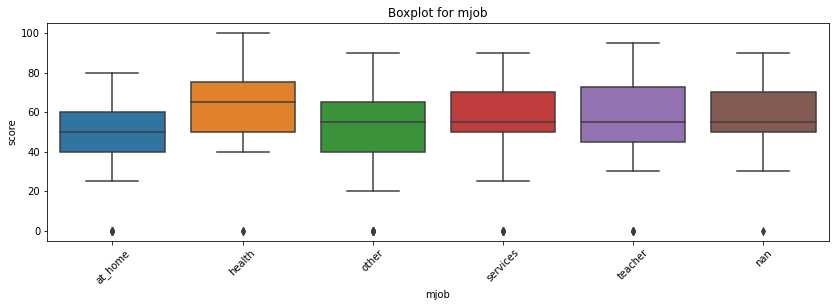

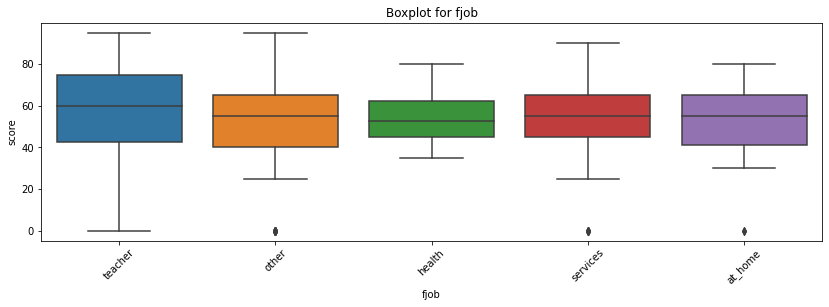

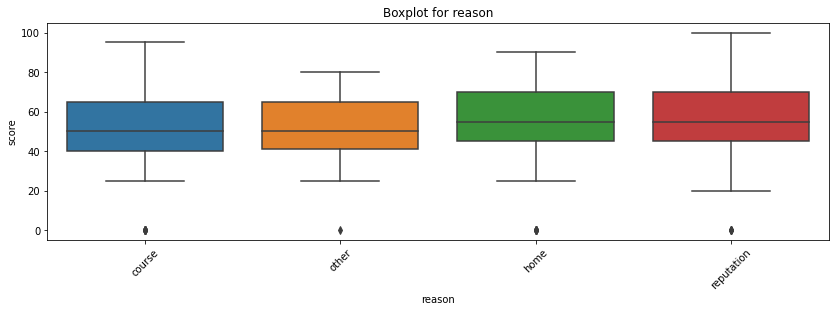

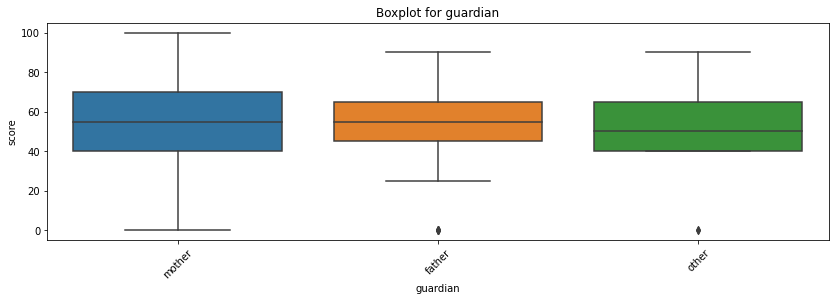

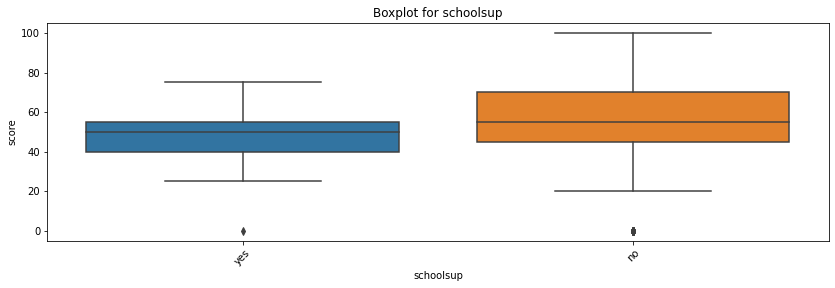

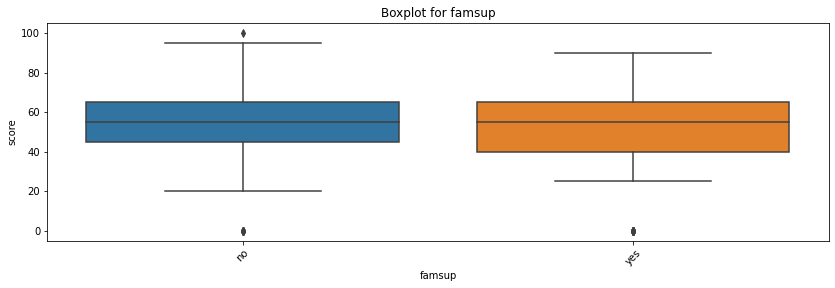

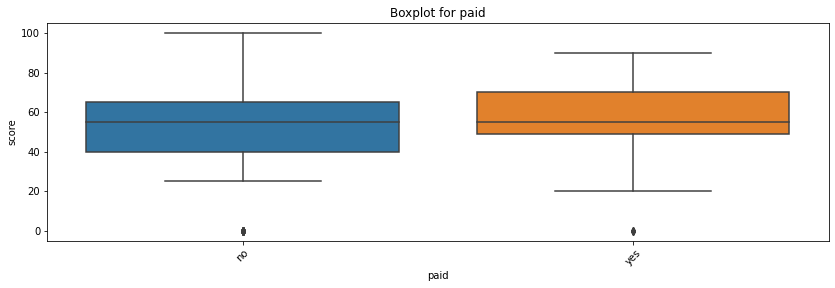

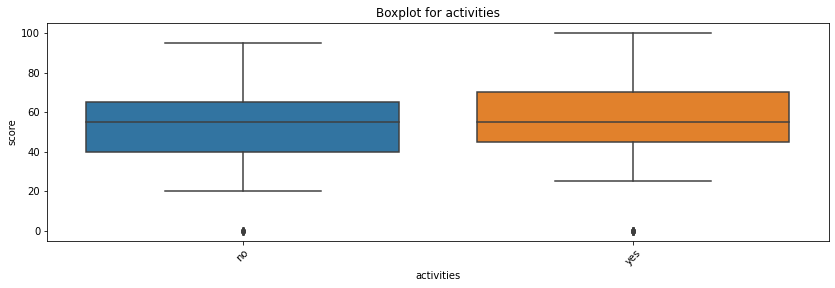

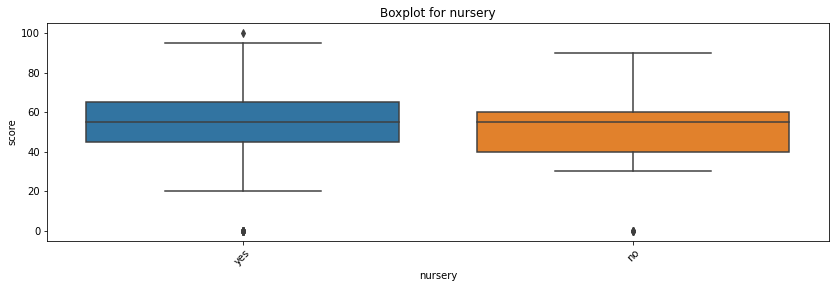

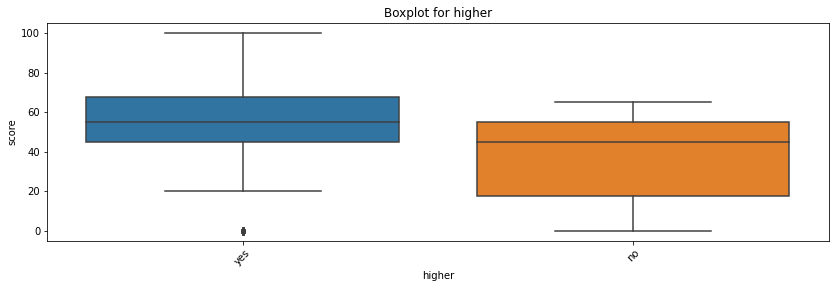

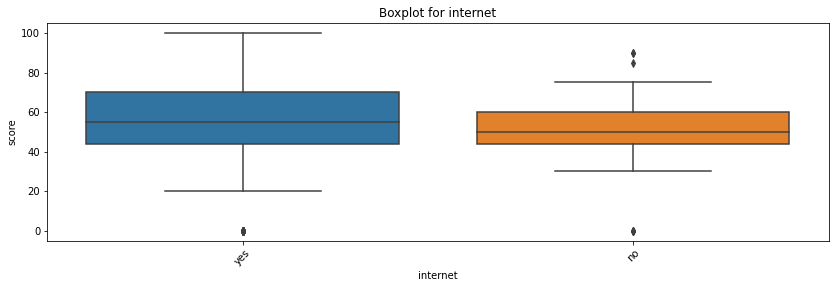

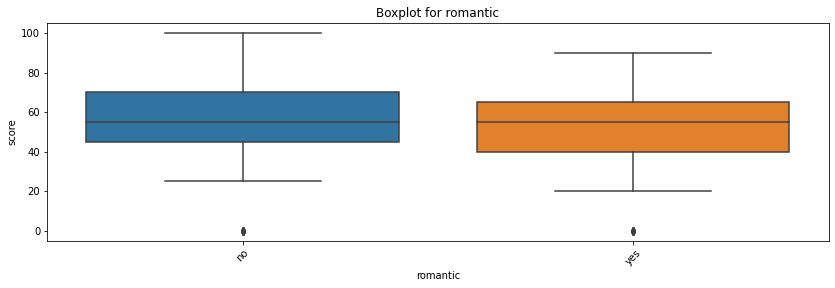

In [38]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

## Выводы по анализу номинативных переменных:
1. Признак school оказывает влияние на результаты успеваемости по математике. Признак целесообразно оставить. В GP school лучше готовят учеников.
2. Признак sex целесообразно удалить из анализа.
3. Признак famsize целесообразно удалить из анализа.
4. Признак Pstatus целесообразно удалить из анализа.
5. Признак reason целесообразно оставить.
6. Признак guardian целесообразно оставить.
7. Признак schoolsup целесообразно оставить.
8. Признак famsup целесообразно удалить из анализа.
9. Признак paid предлагается оставить (несмотря на медианное значение) для более детального рассмотрения. Возможно платные доп занятия не эффективны ввиду низкой мотивации учеников.
10. Признак activities целесообразно удалить из анализа.
11. Признак nursery целесообразно удалить из анализа.
12. Признак higher обязателен к анализу.
13. Признак romantic целесообразно удалить из анализа.
14. Признак address целесообразно оставить.
15. Признаки mjob, fjob  целесообразно оставить.
16. Признак internet целесообразно оставить.
17. Признак address целесообразно оставить. 


Тест Стьюдента.
Прошу оказать помощь в моделировании теста. Приведенный листинг не обнаруживает статистически значимых результатов

In [40]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)